# HISTORY

#### Context
* A collection of water bodies images captured by the Sentinel-2 Satellite. Each image comes with a black and white mask where white represents water and black represents something else but water. The masks were generated by calculating the NWDI (Normalized Water Difference Index) which is frequently used to detect and measure vegetation in satellite images, but a greater threshold was used to detect water bodies.

# PACKAGES AND LIBRARIES

In [2]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
import skimage
from skimage.morphology import convex_hull_image, erosion
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D,\
ZeroPadding2D, Convolution2D, ZeroPadding2D, Conv2DTranspose,ReLU, UpSampling2D, Concatenate, Conv2DTranspose
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.models import load_model
from keras import backend
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

# PATH,LABEL,TRANSFORMATION PROCESS

#### MAIN PATH

In [3]:
IMG_Path = Path("../input/satellite-images-of-water-bodies/Water Bodies Dataset/Images")
Mask_Path = Path("../input/satellite-images-of-water-bodies/Water Bodies Dataset/Masks")

#### IMAGE PATH

In [4]:
Water_JPG = list(IMG_Path.glob(r"*.jpg"))
Mask_JPG = list(Mask_Path.glob(r"*.jpg"))

#### TO SERIES

In [5]:
Water_JPG_Series = pd.Series(Water_JPG,name="JPG").astype(str)
Mask_JPG_Series = pd.Series(Mask_JPG,name="MASK").astype(str)

In [6]:
Mask_JPG_Series[1]

'../input/satellite-images-of-water-bodies/Water Bodies Dataset/Masks/water_body_1350.jpg'

#### TO DATAFRAME

In [7]:
Main_Data = pd.concat([Water_JPG_Series,Mask_JPG_Series],axis=1)

In [8]:
print(Main_Data.head(-1))

                                                    JPG  \
0     ../input/satellite-images-of-water-bodies/Wate...   
1     ../input/satellite-images-of-water-bodies/Wate...   
2     ../input/satellite-images-of-water-bodies/Wate...   
3     ../input/satellite-images-of-water-bodies/Wate...   
4     ../input/satellite-images-of-water-bodies/Wate...   
...                                                 ...   
2835  ../input/satellite-images-of-water-bodies/Wate...   
2836  ../input/satellite-images-of-water-bodies/Wate...   
2837  ../input/satellite-images-of-water-bodies/Wate...   
2838  ../input/satellite-images-of-water-bodies/Wate...   
2839  ../input/satellite-images-of-water-bodies/Wate...   

                                                   MASK  
0     ../input/satellite-images-of-water-bodies/Wate...  
1     ../input/satellite-images-of-water-bodies/Wate...  
2     ../input/satellite-images-of-water-bodies/Wate...  
3     ../input/satellite-images-of-water-bodies/Wate...  
4

# VISION

#### GENERAL CHECKING

Text(0.5, 1.0, 'MASK')

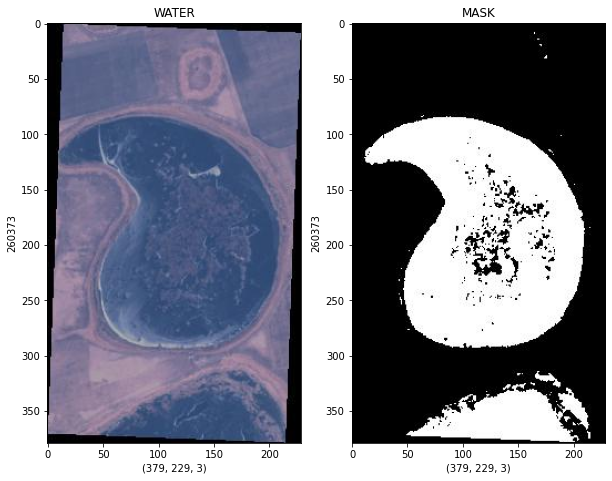

In [9]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

Example_Water = cv2.cvtColor(cv2.imread(Main_Data["JPG"][4]),cv2.COLOR_BGR2RGB)
Example_Mask = cv2.cvtColor(cv2.imread(Main_Data["MASK"][4]),cv2.COLOR_BGR2RGB)

axis[0].imshow(Example_Water)
axis[0].set_xlabel(Example_Water.shape)
axis[0].set_ylabel(Example_Water.size)
axis[0].set_title("WATER")
axis[1].imshow(Example_Mask)
axis[1].set_xlabel(Example_Mask.shape)
axis[1].set_ylabel(Example_Mask.size)
axis[1].set_title("MASK")

Text(0.5, 1.0, 'MASK')

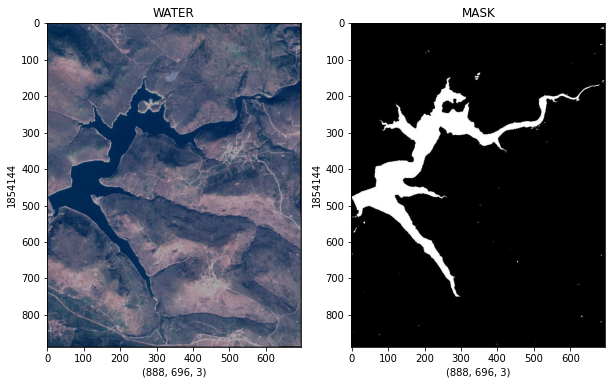

In [10]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

Example_Water = cv2.cvtColor(cv2.imread(Main_Data["JPG"][400]),cv2.COLOR_BGR2RGB)
Example_Mask = cv2.cvtColor(cv2.imread(Main_Data["MASK"][400]),cv2.COLOR_BGR2RGB)

axis[0].imshow(Example_Water)
axis[0].set_xlabel(Example_Water.shape)
axis[0].set_ylabel(Example_Water.size)
axis[0].set_title("WATER")
axis[1].imshow(Example_Mask)
axis[1].set_xlabel(Example_Mask.shape)
axis[1].set_ylabel(Example_Mask.size)
axis[1].set_title("MASK")

Text(0.5, 1.0, 'MASK')

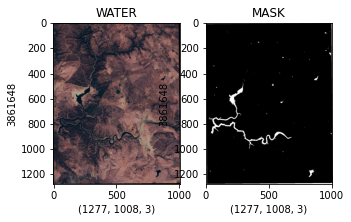

In [11]:
figure,axis = plt.subplots(1,2,figsize=(5,5))

Example_Water = cv2.cvtColor(cv2.imread(Main_Data["JPG"][1237]),cv2.COLOR_BGR2RGB)
Example_Mask = cv2.cvtColor(cv2.imread(Main_Data["MASK"][1237]),cv2.COLOR_BGR2RGB)

axis[0].imshow(Example_Water)
axis[0].set_xlabel(Example_Water.shape)
axis[0].set_ylabel(Example_Water.size)
axis[0].set_title("WATER")
axis[1].imshow(Example_Mask)
axis[1].set_xlabel(Example_Mask.shape)
axis[1].set_ylabel(Example_Mask.size)
axis[1].set_title("MASK")

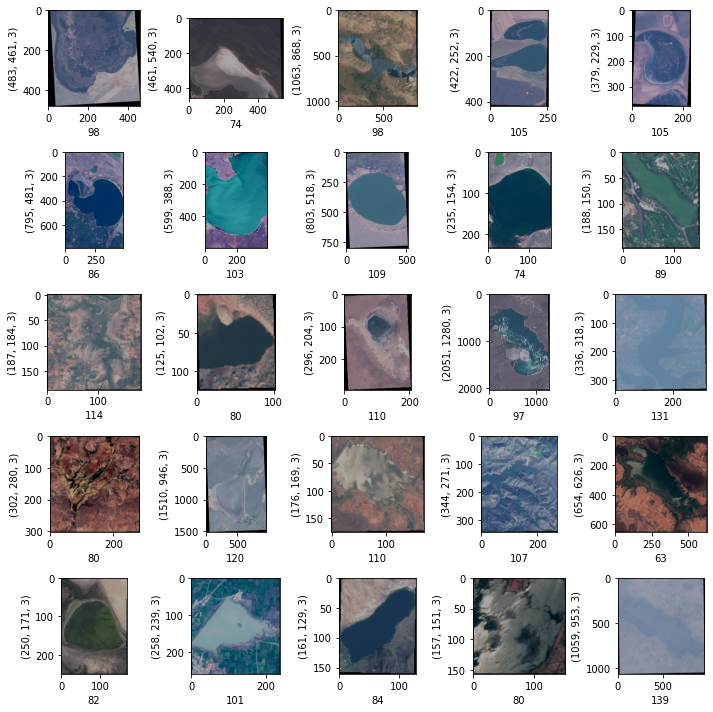

In [12]:
figure,axis = plt.subplots(5,5,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    Ex_Water = cv2.cvtColor(cv2.imread(Main_Data["JPG"][indexing]),cv2.COLOR_BGR2RGB)
    
    operations.set_ylabel(Ex_Water.shape)
    operations.set_xlabel(round(np.mean(Ex_Water)))
    operations.imshow(Ex_Water)
    
plt.tight_layout()
plt.show()

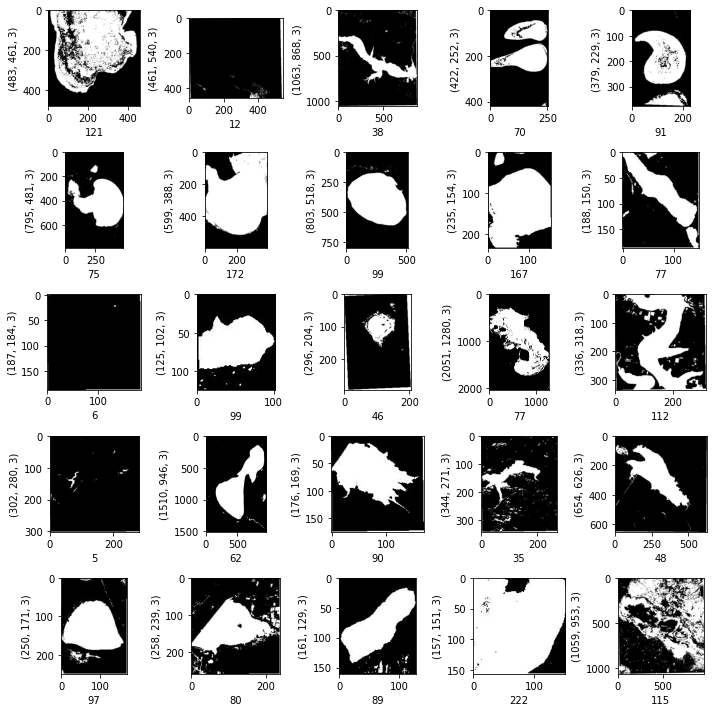

In [13]:
figure,axis = plt.subplots(5,5,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    Ex_Water_Mask = cv2.cvtColor(cv2.imread(Main_Data["MASK"][indexing]),cv2.COLOR_BGR2RGB)
    
    operations.set_ylabel(Ex_Water_Mask.shape)
    operations.set_xlabel(round(np.mean(Ex_Water_Mask)))
    operations.imshow(Ex_Water_Mask)
    
plt.tight_layout()
plt.show()

#### THRESHOLD EXAMPLE

Text(0.5, 1.0, 'THRESHOLD')

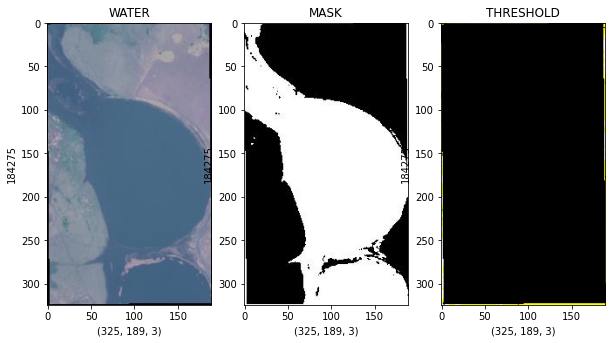

In [14]:
figure,axis = plt.subplots(1,3,figsize=(10,10))

Example_Water = cv2.cvtColor(cv2.imread(Main_Data["JPG"][121]),cv2.COLOR_BGR2RGB)
Example_Mask = cv2.cvtColor(cv2.imread(Main_Data["MASK"][121]),cv2.COLOR_BGR2RGB)

_,Threshold_Water = cv2.threshold(Example_Water,10,255,cv2.THRESH_BINARY_INV)

axis[0].imshow(Example_Water)
axis[0].set_xlabel(Example_Water.shape)
axis[0].set_ylabel(Example_Water.size)
axis[0].set_title("WATER")
axis[1].imshow(Example_Mask)
axis[1].set_xlabel(Example_Mask.shape)
axis[1].set_ylabel(Example_Mask.size)
axis[1].set_title("MASK")
axis[2].imshow(Threshold_Water)
axis[2].set_xlabel(Threshold_Water.shape)
axis[2].set_ylabel(Threshold_Water.size)
axis[2].set_title("THRESHOLD")


Text(0.5, 1.0, 'THRESHOLD')

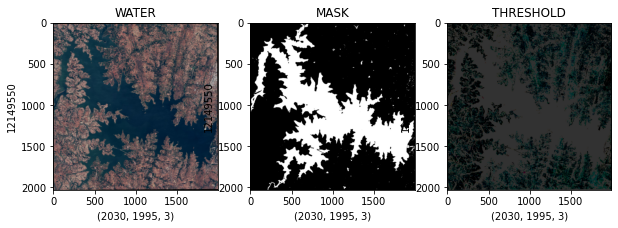

In [15]:
figure,axis = plt.subplots(1,3,figsize=(10,10))

Example_Water = cv2.cvtColor(cv2.imread(Main_Data["JPG"][101]),cv2.COLOR_BGR2RGB)
Example_Mask = cv2.cvtColor(cv2.imread(Main_Data["MASK"][101]),cv2.COLOR_BGR2RGB)

_,Threshold_Water = cv2.threshold(Example_Water,90,50,cv2.THRESH_BINARY_INV)

axis[0].imshow(Example_Water)
axis[0].set_xlabel(Example_Water.shape)
axis[0].set_ylabel(Example_Water.size)
axis[0].set_title("WATER")
axis[1].imshow(Example_Mask)
axis[1].set_xlabel(Example_Mask.shape)
axis[1].set_ylabel(Example_Mask.size)
axis[1].set_title("MASK")
axis[2].imshow(Threshold_Water)
axis[2].set_xlabel(Threshold_Water.shape)
axis[2].set_ylabel(Threshold_Water.size)
axis[2].set_title("THRESHOLD")

#### INRANGE EXAMPLE

Text(0.5, 1.0, 'BITWISE')

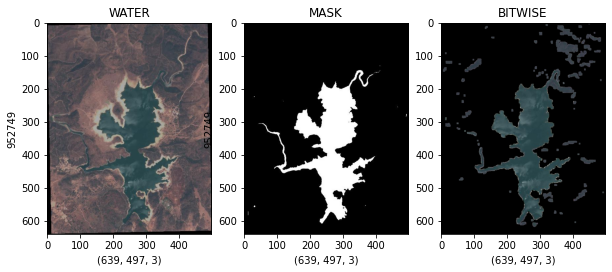

In [16]:
figure,axis = plt.subplots(1,3,figsize=(10,10))
mask_k = np.ones((5,5),dtype="uint8")

lower_blue = np.array([90, 50, 70], dtype=np.uint8)
upper_blue = np.array([128, 255, 255], dtype=np.uint8)


Example_Water = cv2.cvtColor(cv2.imread(Main_Data["JPG"][100]),cv2.COLOR_BGR2RGB)
Example_Mask = cv2.cvtColor(cv2.imread(Main_Data["MASK"][100]),cv2.COLOR_BGR2RGB)

HSV_Water = cv2.cvtColor(Example_Water,cv2.COLOR_RGB2HSV)
Inrange_Mask = cv2.inRange(HSV_Water,lower_blue,upper_blue)
Dilate_Img = cv2.dilate(Inrange_Mask,mask_k)
Bıtwise_Img = cv2.bitwise_and(Example_Water,Example_Water,mask=Dilate_Img)

axis[0].imshow(Example_Water)
axis[0].set_xlabel(Example_Water.shape)
axis[0].set_ylabel(Example_Water.size)
axis[0].set_title("WATER")
axis[1].imshow(Example_Mask)
axis[1].set_xlabel(Example_Mask.shape)
axis[1].set_ylabel(Example_Mask.size)
axis[1].set_title("MASK")
axis[2].imshow(Bıtwise_Img)
axis[2].set_xlabel(Bıtwise_Img.shape)
axis[2].set_ylabel(Bıtwise_Img.size)
axis[2].set_title("BITWISE")


Text(0.5, 1.0, 'BITWISE')

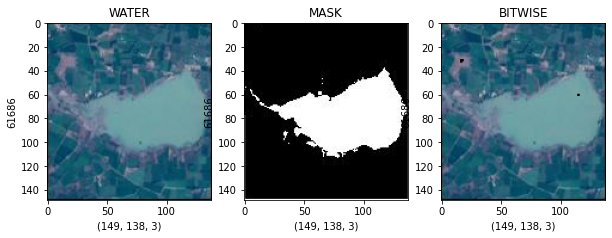

In [17]:
figure,axis = plt.subplots(1,3,figsize=(10,10))
mask_k = np.ones((5,5),dtype="uint8")

lower_blue = np.array([90, 50, 70], dtype=np.uint8)
upper_blue = np.array([128, 255, 255], dtype=np.uint8)


Example_Water = cv2.cvtColor(cv2.imread(Main_Data["JPG"][1000]),cv2.COLOR_BGR2RGB)
Example_Mask = cv2.cvtColor(cv2.imread(Main_Data["MASK"][1000]),cv2.COLOR_BGR2RGB)

HSV_Water = cv2.cvtColor(Example_Water,cv2.COLOR_RGB2HSV)
Inrange_Mask = cv2.inRange(HSV_Water,lower_blue,upper_blue)
Dilate_Img = cv2.dilate(Inrange_Mask,mask_k)
Bıtwise_Img = cv2.bitwise_and(Example_Water,Example_Water,mask=Dilate_Img)

axis[0].imshow(Example_Water)
axis[0].set_xlabel(Example_Water.shape)
axis[0].set_ylabel(Example_Water.size)
axis[0].set_title("WATER")
axis[1].imshow(Example_Mask)
axis[1].set_xlabel(Example_Mask.shape)
axis[1].set_ylabel(Example_Mask.size)
axis[1].set_title("MASK")
axis[2].imshow(Bıtwise_Img)
axis[2].set_xlabel(Bıtwise_Img.shape)
axis[2].set_ylabel(Bıtwise_Img.size)
axis[2].set_title("BITWISE")

Text(0.5, 1.0, 'BITWISE')

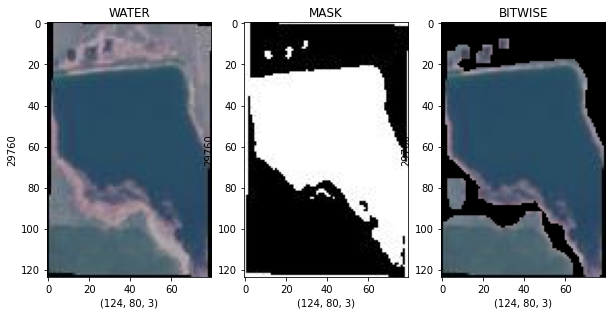

In [18]:
figure,axis = plt.subplots(1,3,figsize=(10,10))
mask_k = np.ones((5,5),dtype="uint8")

lower_blue = np.array([90, 50, 70], dtype=np.uint8)
upper_blue = np.array([128, 255, 255], dtype=np.uint8)


Example_Water = cv2.cvtColor(cv2.imread(Main_Data["JPG"][589]),cv2.COLOR_BGR2RGB)
Example_Mask = cv2.cvtColor(cv2.imread(Main_Data["MASK"][589]),cv2.COLOR_BGR2RGB)

HSV_Water = cv2.cvtColor(Example_Water,cv2.COLOR_RGB2HSV)
Inrange_Mask = cv2.inRange(HSV_Water,lower_blue,upper_blue)
Dilate_Img = cv2.dilate(Inrange_Mask,mask_k)
Bıtwise_Img = cv2.bitwise_and(Example_Water,Example_Water,mask=Dilate_Img)

axis[0].imshow(Example_Water)
axis[0].set_xlabel(Example_Water.shape)
axis[0].set_ylabel(Example_Water.size)
axis[0].set_title("WATER")
axis[1].imshow(Example_Mask)
axis[1].set_xlabel(Example_Mask.shape)
axis[1].set_ylabel(Example_Mask.size)
axis[1].set_title("MASK")
axis[2].imshow(Bıtwise_Img)
axis[2].set_xlabel(Bıtwise_Img.shape)
axis[2].set_ylabel(Bıtwise_Img.size)
axis[2].set_title("BITWISE")

Text(0.5, 1.0, 'BITWISE')

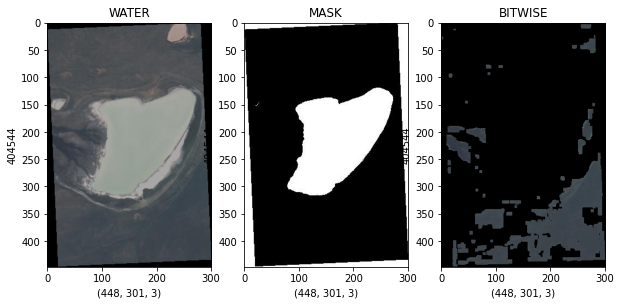

In [19]:
figure,axis = plt.subplots(1,3,figsize=(10,10))
mask_k = np.ones((5,5),dtype="uint8")

lower_blue = np.array([90, 50, 30], dtype=np.uint8)
upper_blue = np.array([128, 255, 255], dtype=np.uint8)


Example_Water = cv2.cvtColor(cv2.imread(Main_Data["JPG"][89]),cv2.COLOR_BGR2RGB)
Example_Mask = cv2.cvtColor(cv2.imread(Main_Data["MASK"][89]),cv2.COLOR_BGR2RGB)

HSV_Water = cv2.cvtColor(Example_Water,cv2.COLOR_RGB2HSV)
Inrange_Mask = cv2.inRange(HSV_Water,lower_blue,upper_blue)
Dilate_Img = cv2.dilate(Inrange_Mask,mask_k)
Bıtwise_Img = cv2.bitwise_and(Example_Water,Example_Water,mask=Dilate_Img)

axis[0].imshow(Example_Water)
axis[0].set_xlabel(Example_Water.shape)
axis[0].set_ylabel(Example_Water.size)
axis[0].set_title("WATER")
axis[1].imshow(Example_Mask)
axis[1].set_xlabel(Example_Mask.shape)
axis[1].set_ylabel(Example_Mask.size)
axis[1].set_title("MASK")
axis[2].imshow(Bıtwise_Img)
axis[2].set_xlabel(Bıtwise_Img.shape)
axis[2].set_ylabel(Bıtwise_Img.size)
axis[2].set_title("BITWISE")

# DATA PROCESS

#### TRANSFORMATION

In [20]:
Water_List = []
Mask_List = []

for water_i,mask_i in zip(Main_Data.JPG,Main_Data.MASK):
    
    Reading_IMG_Water = cv2.cvtColor(cv2.imread(water_i),cv2.COLOR_BGR2RGB)
    Reading_IMG_Water = cv2.resize(Reading_IMG_Water,(180,180))
    Reading_IMG_Water = Reading_IMG_Water / 255.
    
    Reading_IMG_Mask = cv2.cvtColor(cv2.imread(mask_i),cv2.COLOR_BGR2RGB)
    Reading_IMG_Mask = cv2.resize(Reading_IMG_Mask,(180,180))
    Reading_IMG_Mask = Reading_IMG_Mask / 255.
    
    Water_List.append(Reading_IMG_Water)
    Mask_List.append(Reading_IMG_Mask[:,:,0])

In [21]:
print("MASK IMG SHAPE: ",Mask_List[0].shape)
print("WATER IMG SHAPE: ",Water_List[0].shape)

MASK IMG SHAPE:  (180, 180)
WATER IMG SHAPE:  (180, 180, 3)


In [22]:
print("MASK IMG TYPE: ",Mask_List[0].dtype)
print("WATER IMG TYPE: ",Water_List[0].dtype)

MASK IMG TYPE:  float64
WATER IMG TYPE:  float64


In [23]:
Mask_Array = np.array(Mask_List)
Water_Array = np.array(Water_List)

In [24]:
print("MASK ARRAY SHAPE: ",Mask_Array.shape)
print("WATER ARRAY SHAPE: ",Water_Array.shape)

MASK ARRAY SHAPE:  (2841, 180, 180)
WATER ARRAY SHAPE:  (2841, 180, 180, 3)


# MODEL

In [25]:
compile_loss = "binary_crossentropy"
compile_optimizer = "adam"
compile_metrics = ["accuracy"]
input_dim = (Water_Array.shape[1],Water_Array.shape[2],Water_Array.shape[3])
output_class = 1

In [26]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./modelcheck")

## Model 1 (Auto Encoder)

In [27]:
Encoder_G = Sequential()
Encoder_G.add(Conv2D(32,(2,2),kernel_initializer = 'he_normal'))
Encoder_G.add(BatchNormalization())
Encoder_G.add(ReLU())
#
Encoder_G.add(Conv2D(64,(2,2),kernel_initializer = 'he_normal'))
Encoder_G.add(BatchNormalization())
Encoder_G.add(ReLU())
#
Encoder_G.add(Conv2D(128,(2,2),kernel_initializer = 'he_normal'))
Encoder_G.add(BatchNormalization())
Encoder_G.add(ReLU())

In [28]:
Decoder_G = Sequential()
Decoder_G.add(Conv2DTranspose(64,(2,2)))
Decoder_G.add(ReLU())
#
Decoder_G.add(Conv2DTranspose(32,(2,2)))
Decoder_G.add(ReLU())
#
Decoder_G.add(Conv2DTranspose(1,(2,2)))
Decoder_G.add(ReLU())

In [29]:
Auto_Encoder = Sequential([Encoder_G,Decoder_G])

In [30]:
Auto_Encoder.compile(loss=compile_loss,optimizer=compile_optimizer,metrics=compile_metrics)

In [31]:
Auto_Encoder_Model = Auto_Encoder.fit(Water_Array,Mask_Array,epochs=25,callbacks=[Early_Stopper,Checkpoint_Model])

Epoch 1/25
89/89 [==============================] - 794s 9s/step - loss: 0.9276 - accuracy: 0.6064
Epoch 2/25
89/89 [==============================] - 797s 9s/step - loss: 0.4676 - accuracy: 0.6627
Epoch 3/25
89/89 [==============================] - 807s 9s/step - loss: 0.4512 - accuracy: 0.6695
Epoch 4/25
89/89 [==============================] - 813s 9s/step - loss: 0.4437 - accuracy: 0.6788
Epoch 5/25
89/89 [==============================] - 813s 9s/step - loss: 0.4301 - accuracy: 0.6804
Epoch 6/25
89/89 [==============================] - 791s 9s/step - loss: 0.4198 - accuracy: 0.6986
Epoch 7/25
89/89 [==============================] - 789s 9s/step - loss: 0.4116 - accuracy: 0.6931
Epoch 8/25
89/89 [==============================] - 790s 9s/step - loss: 0.4638 - accuracy: 0.6581
Epoch 9/25
89/89 [==============================] - 789s 9s/step - loss: 0.4434 - accuracy: 0.6816
Epoch 10/25
89/89 [==============================] - 790s 9s/step - loss: 0.4100 - accuracy: 0.6962
Epoch 11/

#### PREDICTION

In [44]:
Prediction_IMG = Auto_Encoder.predict(Water_Array[:30])

In [33]:
print(Prediction_IMG[20].shape)

(180, 180, 1)


## MODEL 2

In [ ]:
# Simple FCN-like model
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False)#, input_shape=(256, 256, 3))
x = base_model.output
x = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(x)
x = tf.keras.layers.UpSampling2D(size=(32, 32))(x) 
model2 = tf.keras.Model(inputs=base_model.input, outputs=x)

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train on dummy data
model2.fit(Water_Array,Mask_Array, epochs=1,callbacks=[Early_Stopper,Checkpoint_Model])  # Just 1 epoch for demonstration

# Save the model
model.save('FCN_model.h5')

## THE OUTPUT

Text(0.5, 1.0, 'PREDICTION MASK')

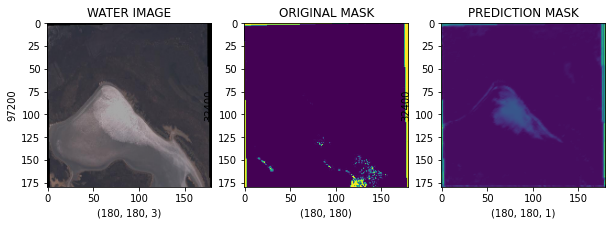

In [53]:
figure,axis = plt.subplots(1,3,figsize=(10,8))
prediction_img_number = 1

Original_Img = Water_Array[prediction_img_number]
Original_Mask = Mask_Array[prediction_img_number]
Predict_Mask = Prediction_IMG[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("WATER IMAGE")
axis[1].imshow(Original_Mask)
axis[1].set_xlabel(Original_Mask.shape)
axis[1].set_ylabel(Original_Mask.size)
axis[1].set_title("ORIGINAL MASK")
axis[2].imshow(Predict_Mask)
axis[2].set_xlabel(Predict_Mask.shape)
axis[2].set_ylabel(Predict_Mask.size)
axis[2].set_title("PREDICTION MASK")

Text(0.5, 1.0, 'MASK')

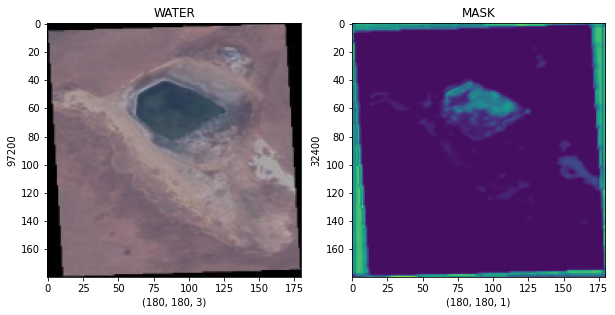

In [36]:
figure,axis = plt.subplots(1,2,figsize=(10,10))
prediction_img_number = 12

Original_Img = Water_Array[prediction_img_number]
Predict_Mask = Prediction_IMG[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("WATER")
axis[1].imshow(Predict_Mask)
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("MASK")

Text(0.5, 1.0, 'MASK')

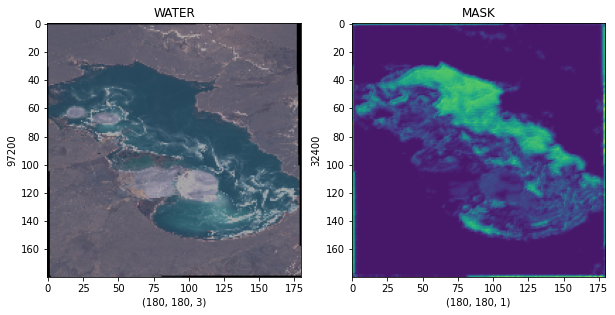

In [37]:
figure,axis = plt.subplots(1,2,figsize=(10,10))
prediction_img_number = 13

Original_Img = Water_Array[prediction_img_number]
Predict_Mask = Prediction_IMG[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("WATER")
axis[1].imshow(Predict_Mask)
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("MASK")

Text(0.5, 1.0, 'MASK')

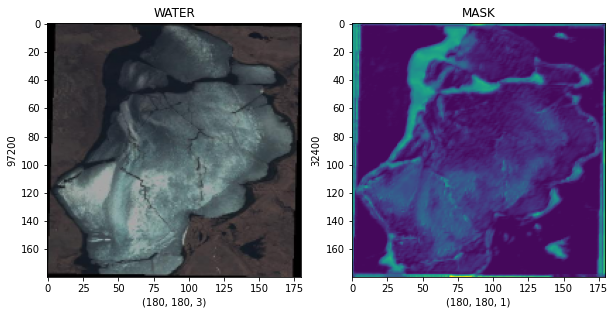

In [39]:
figure,axis = plt.subplots(1,2,figsize=(10,10))
prediction_img_number = 27

Original_Img = Water_Array[prediction_img_number]
Predict_Mask = Prediction_IMG[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("WATER")
axis[1].imshow(Predict_Mask)
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("MASK")

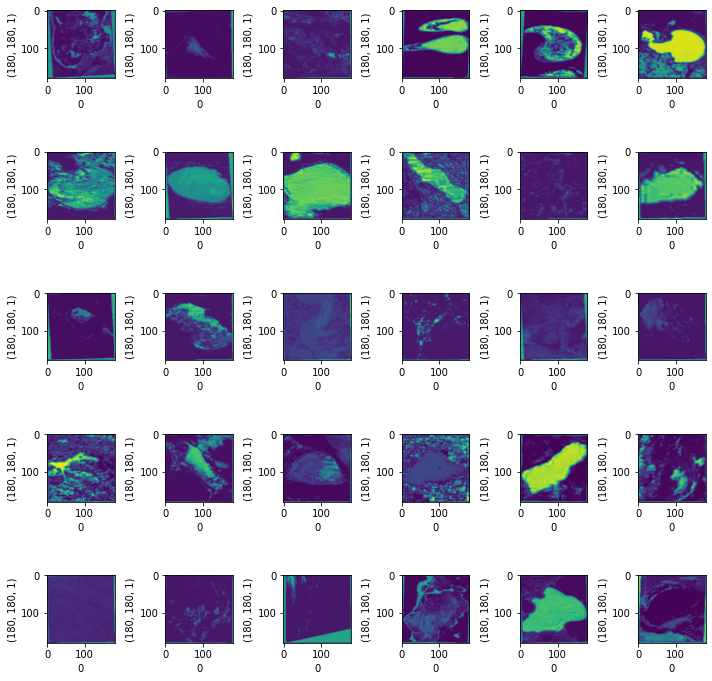

In [45]:
figure,axis = plt.subplots(5,6,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    Predict_Mask = Prediction_IMG[indexing]
    
    operations.set_ylabel(Predict_Mask.shape)
    operations.set_xlabel(round(np.mean(Predict_Mask)))
    operations.imshow(Predict_Mask)
    
plt.tight_layout()
plt.show()

In [61]:
Auto_Encoder.save("Auto_Encoder.h5")


In [49]:
Auto_Encoder.save("Auto_Encoder_Model.h5")


In [58]:
print(Auto_Encoder)

#### PREDICTION / THE MODEL HAS NEVER SEEN BEFORE

In [ ]:
def prediction_process(image,model):
    backend.set_image_data_format('channels_last')

    Non_S_IMG = cv2.cvtColor(cv2.imread(image),
                            cv2.COLOR_BGR2RGB)

    Resize_IMG = cv2.resize(Non_S_IMG,(180,180))
    Resize_IMG = Resize_IMG/255.
    Resize_IMG_Prediction = Resize_IMG.reshape(-1,Resize_IMG.shape[0],Resize_IMG.shape[1],Resize_IMG.shape[2])
    Prediction_IMG_Another = model.predict(Resize_IMG_Prediction)
    Prediction_IMG_Another = Prediction_IMG_Another.reshape(Prediction_IMG_Another.shape[1],
                                                        Prediction_IMG_Another.shape[2],
                                                        Prediction_IMG_Another.shape[3])
    
    return Resize_IMG,Prediction_IMG_Another

In [ ]:
Resize_Image,Prediction_N_S_Image = prediction_process("../input/water-secret/su/1984.jpg",Auto_Encoder)

figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(Resize_Image)
axis[0].set_xlabel(Resize_Image.shape)
axis[0].set_ylabel(Resize_Image.size)
axis[0].set_title("1984-ORIGINAL")
axis[1].imshow(Prediction_N_S_Image)
axis[1].set_xlabel(Prediction_N_S_Image.shape)
axis[1].set_ylabel(Prediction_N_S_Image.size)
axis[1].set_title("1984-MASK")

plt.savefig("1984.png")

#### PREDICTION FOR VIDEO / THE MODEL HAS NEVER SEEN BEFORE

In [59]:
Ice_Video_Set = "../input/climate-change-video-set-nasa/climate/nsceeu_1.mp4"

In [60]:
Prediction_IMG_List = []
Capture_Video = cv2.VideoCapture(Ice_Video_Set)

while Capture_Video.isOpened():
    
    ret,frame = Capture_Video.read()
    
    if ret != True:
        break
        
    if Capture_Video.isOpened():
            
        Transformation_IMG = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        Resize_IMG = cv2.resize(Transformation_IMG,(180,180))
        Resize_IMG = Resize_IMG / 255.
        Resize_IMG_Prediction = Resize_IMG.reshape(-1,Resize_IMG.shape[0],Resize_IMG.shape[1],Resize_IMG.shape[2])
        Prediction_IMG_Another = Auto_Encoder.predict(Resize_IMG_Prediction)
        Prediction_IMG_Another = Prediction_IMG_Another.reshape(Prediction_IMG_Another.shape[1],
                                                        Prediction_IMG_Another.shape[2],
                                                        Prediction_IMG_Another.shape[3])
        
        Prediction_IMG_List.append(Prediction_IMG_Another)
    

        
        
Capture_Video.release()

In [ ]:
Prediction_Array = np.array(Prediction_IMG_List)

In [ ]:
print(Prediction_Array.shape)

In [ ]:
def simple_vision(image):
    
    figure = plt.figure(figsize=(10,10))
    
    plt.xlabel(np.mean(image))
    plt.ylabel(image.size)
    plt.imshow(image)

In [ ]:
simple_vision(Prediction_Array[112])

In [ ]:
simple_vision(Prediction_Array[300])